In [11]:
!pip install GEOparse
import GEOparse
gse = GEOparse.get_GEO("GSE10072")

12-Jun-2025 16:25:50 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
12-Jun-2025 16:25:50 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
12-Jun-2025 16:25:50 INFO GEOparse - Parsing ./GSE10072_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE10072_family.soft.gz: 
12-Jun-2025 16:25:50 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
12-Jun-2025 16:25:50 DEBUG GEOparse - SERIES: GSE10072
DEBUG:GEOparse:SERIES: GSE10072
12-Jun-2025 16:25:50 DEBUG GEOparse - PLATFORM: GPL96
DEBUG:GEOparse:PLATFORM: GPL96
12-Jun-2025 16:25:51 DEBUG GEOparse - SAMPLE: GSM254625
DEBUG:GEOparse:SAMPLE: GSM254625
12-Jun-2025 16:25:51 DEBUG GEOparse - SAMPLE: GSM254626
DEBUG:GEOparse:SAMPLE: GSM254626
12-Jun-2025 16:25:51 DEBUG GEOparse - SAMPLE: GSM254627
DEBUG:GEOparse:SAMPLE: GSM254627
12-Jun-2025 16:25:51 DEBUG GEOparse - SAMPLE: GSM254628
DEBUG:GEOparse:SAMPLE: GSM2546

Extract Expression Matrix

In [12]:
import pandas as pd

samples = gse.gsms
sample_ids = list(samples.keys())
data = pd.DataFrame({sid: samples[sid].table.set_index("ID_REF")["VALUE"] for sid in sample_ids})
data = data.T
data.head()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM254625,10.927084,6.895217,8.110190,9.451286,4.814477,8.774520,5.884616,6.028712,8.648566,4.648521,...,4.663081,5.558929,12.652342,13.021306,5.208449,4.966442,4.454958,4.034979,4.503507,4.396848
GSM254626,10.416978,6.924856,7.760228,9.520943,4.718640,9.368739,6.260079,6.202698,8.572660,4.812522,...,4.784434,5.655303,13.166840,13.341119,5.176357,5.054673,4.461005,4.043990,4.540112,4.464781
GSM254627,10.628538,7.550245,7.974676,9.807597,4.905163,8.407624,6.213473,6.058022,8.877887,4.946105,...,5.471763,6.513422,12.759985,12.656466,5.492227,5.400588,4.642212,4.069773,4.700017,4.714225
GSM254628,10.151180,6.699557,7.712676,9.522087,4.818076,9.000390,6.284605,6.609682,8.331652,4.901348,...,4.904406,5.578589,13.098182,13.382215,5.360600,5.141759,4.600061,3.993398,4.611192,4.579732
GSM254629,10.988512,6.826031,7.775592,9.855061,4.823958,9.104299,6.193348,6.119129,7.752896,4.968485,...,4.994150,5.429397,12.698803,13.027616,5.470905,5.151203,4.580010,4.066657,4.632961,4.633962


Transformed the expression data into a pandas DataFrame where:

Rows = samples (GSM IDs)

Columns = gene probes (ID_REF, e.g., 1007_s_at, 1053_at, etc.)

Each cell = expression value for that gene probe in that sample

Now, let us check the dimensions of the data

In [13]:
data.shape

(107, 22283)

Let us visualize the expression distribution

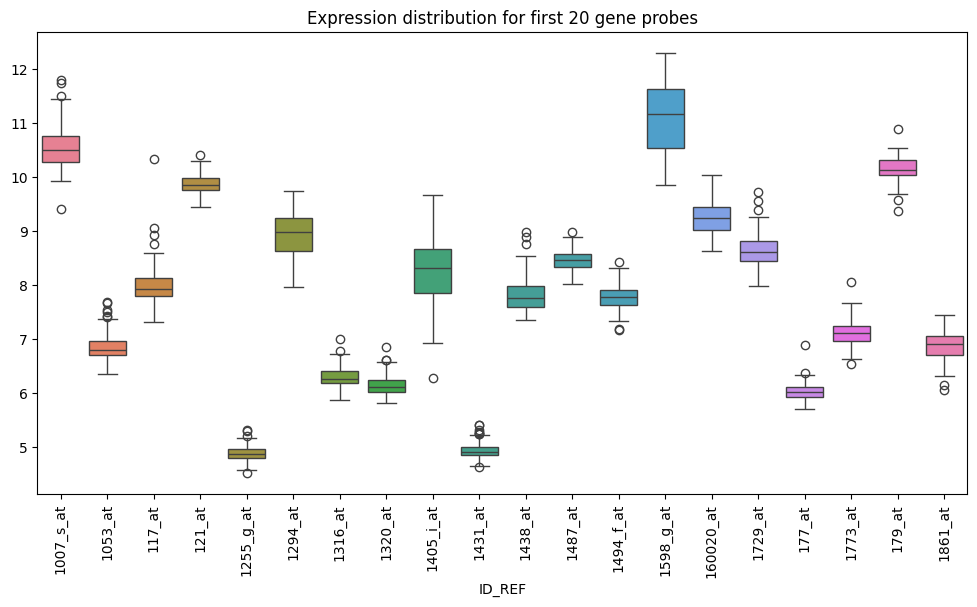

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=data.iloc[:, :20])  # Plot first 20 genes as example
plt.xticks(rotation=90)
plt.title("Expression distribution for first 20 gene probes")
plt.show()

Let us also check for missing data

In [15]:
data.isnull().sum().sum()

np.int64(0)

This retrieves the platform annotation (e.g., GPL570) and extracts a table linking probe IDs to gene symbols. It renames the columns to match the expression data for easier merging.

In [16]:
gpl = gse.gpls[list(gse.gpls.keys())[0]]  # Use platform (GPL570)
annot = gpl.table[["ID", "Gene Symbol"]]
annot.columns = ["ID_REF", "Gene_Symbol"]

This code transposes the expression matrix and merges it with gene annotations to add gene symbols. It then filters the data to retain only rows corresponding to HLA genes.

In [17]:
# Transpose data to make ID_REF a column
expr_data = data.T.reset_index()
expr_data = expr_data.merge(annot, on="ID_REF", how="left")

# Filter for specific genes
hla_genes = expr_data[expr_data["Gene_Symbol"].str.contains("HLA", na=False)]

We can now find the probe ID corresponding to the HLA-A gene and then create a boxplot of its expression values across all samples.

<Axes: title={'center': 'HLA-A Expression'}>

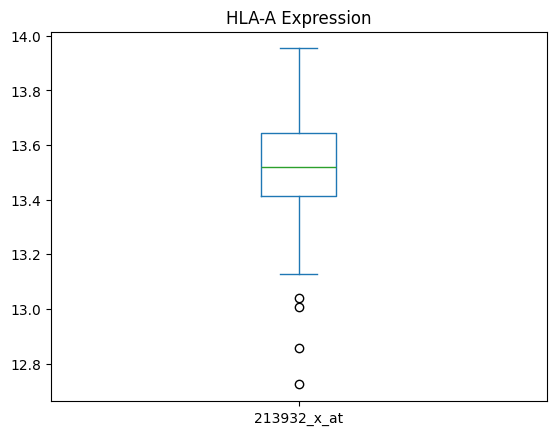

In [18]:
hla_a_probe = hla_genes[hla_genes["Gene_Symbol"] == "HLA-A"]["ID_REF"].values[0]
data[hla_a_probe].plot(kind='box', title='HLA-A Expression')

Now let us create a visually clustered heatmap of the expression levels for the first 100 genes across all samples, helping to identify patterns and groups within the data.

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


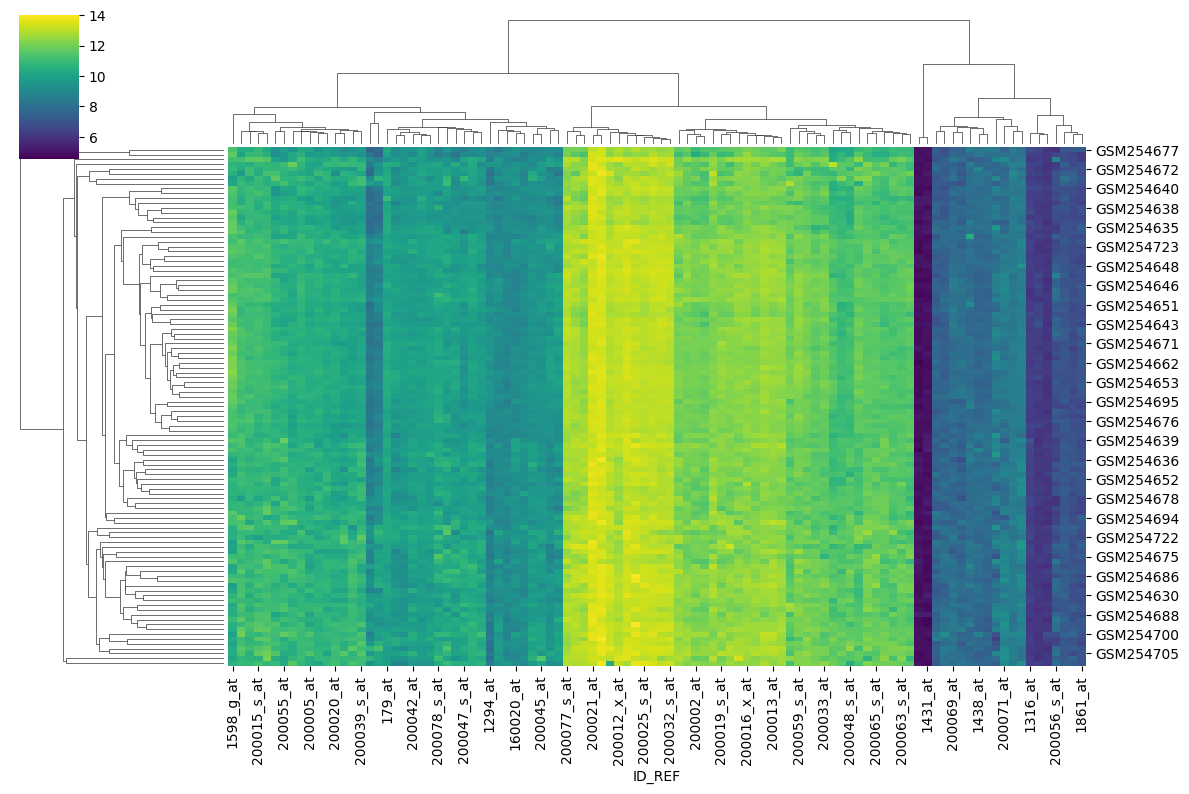

In [19]:
import seaborn as sns

subset = data.iloc[:, :100]  # First 100 genes
sns.clustermap(subset, cmap='viridis', figsize=(12, 8))